In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [2]:
dataset = pd.read_csv(r"C:\Users\Jake Hinkle\Downloads\All Regions.csv")
dataset['CompletedYear']=pd.to_datetime(dataset['CompletedYear'], infer_datetime_format=True)
indexedDataset=dataset.set_index(['CompletedYear'])

In [3]:
from datetime import datetime
indexedDataset.head(5)

,ShortTons
CompletedYear,
2018-01-01,7787
2018-01-02,67
2018-01-03,32869
2018-01-04,66738
2018-01-05,8505


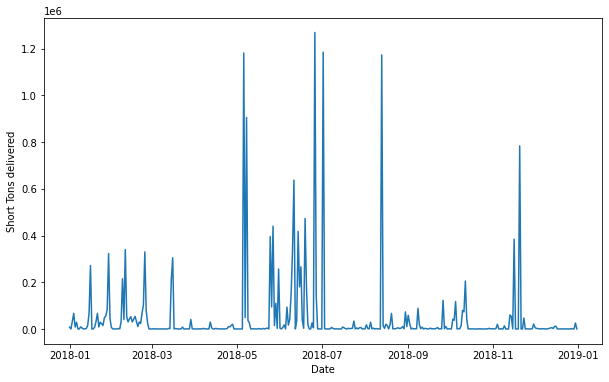

In [4]:
plt.xlabel("Date")
plt.ylabel("Short Tons delivered")
plt.plot(indexedDataset)

In [5]:
rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

                 ShortTons
CompletedYear             
2018-01-01             NaN
2018-01-02             NaN
2018-01-03             NaN
2018-01-04             NaN
2018-01-05             NaN
...                    ...
2018-12-27     1280.583333
2018-12-28      317.000000
2018-12-29      310.083333
2018-12-30     2433.833333
2018-12-31     2433.083333

[365 rows x 1 columns]                  ShortTons
CompletedYear             
2018-01-01             NaN
2018-01-02             NaN
2018-01-03             NaN
2018-01-04             NaN
2018-01-05             NaN
...                    ...
2018-12-27     3362.454446
2018-12-28      412.907870
2018-12-29      417.524405
2018-12-30     7274.717812
2018-12-31     7274.987391

[365 rows x 1 columns]


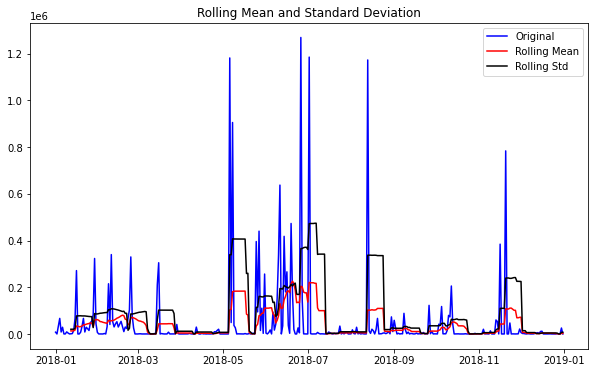

In [6]:
orig=plt.plot(indexedDataset, color='blue', label='Original')
mean=plt.plot(rolmean, color='red', label='Rolling Mean')
std=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [7]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller test:')
dftest=adfuller(indexedDataset['ShortTons'], autolag='AIC')

dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#lags used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
    
print (dfoutput)

Results of Dickey-Fuller test:
Test Statistic                -5.985602e+00
p-value                        1.795331e-07
#lags used                     5.000000e+00
Number of Observations Used    3.590000e+02
Critical Value (1%)           -3.448697e+00
Critical Value (5%)           -2.869625e+00
Critical Value (10%)          -2.571077e+00
dtype: float64


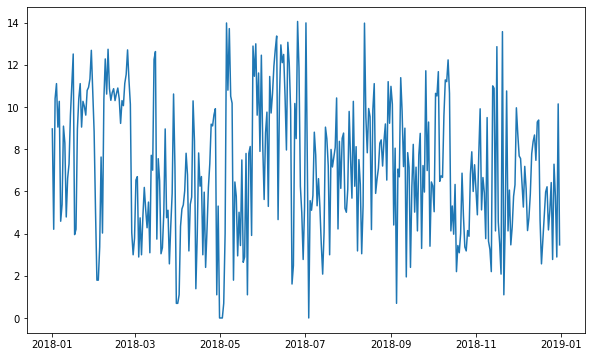

In [8]:
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

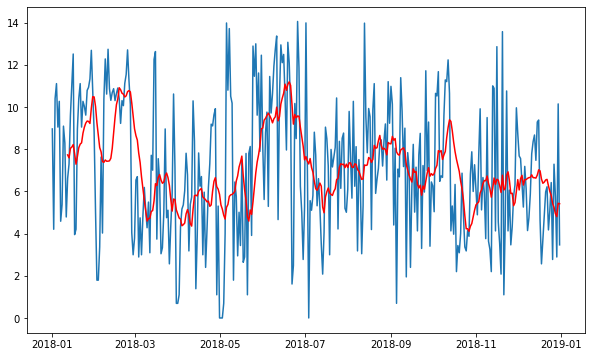

In [9]:
movingAverage=indexedDataset_logScale.rolling(window=12).mean()
movingSTD=indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [10]:
datasetLogScaleMinusMovingAverage=indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,ShortTons
CompletedYear,
2018-01-12,-1.108698
2018-01-13,-0.290606
2018-01-14,1.576673
2018-01-15,3.021776
2018-01-16,4.292880
2018-01-17,-3.842720
2018-01-18,-3.083993
2018-01-19,1.306922
2018-01-20,2.328245


In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    movingAverage=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    
    orig=plt.plot(timeseries, color='blue', label='Original')
    mean=plt.plot(movingAverage, color='red', label='Rolling Mean')
    std=plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print ('Results of Dickey-Fuller test:')
    dftest=adfuller(timeseries['ShortTons'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#lags used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print (dfoutput)

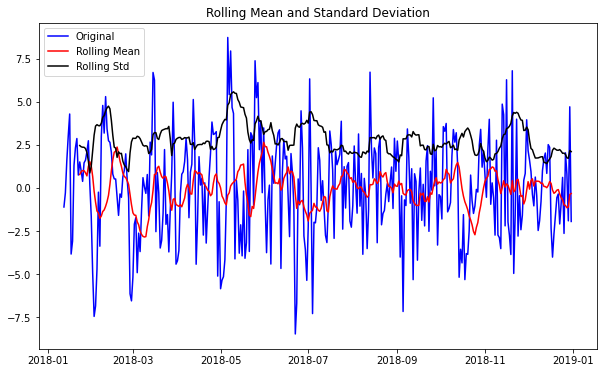

Results of Dickey-Fuller test:
Test Statistic                -8.105171e+00
p-value                        1.268565e-12
#lags used                     8.000000e+00
Number of Observations Used    3.450000e+02
Critical Value (1%)           -3.449447e+00
Critical Value (5%)           -2.869954e+00
Critical Value (10%)          -2.571253e+00
dtype: float64


In [12]:
test_stationarity(datasetLogScaleMinusMovingAverage)

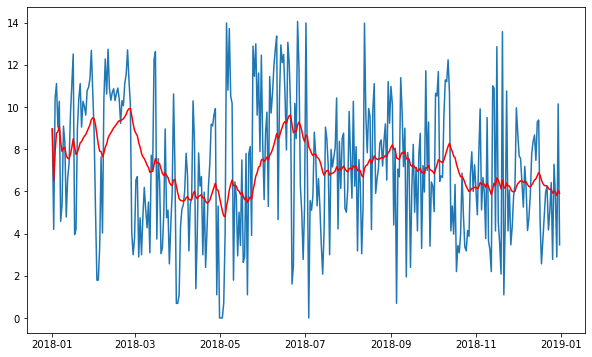

In [13]:
EDWeightedAverage=indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(EDWeightedAverage, color='red')

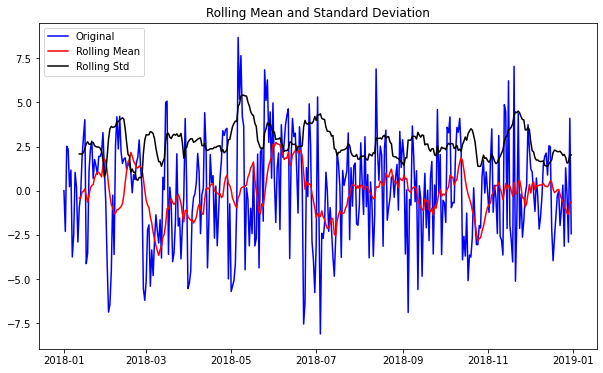

Results of Dickey-Fuller test:
Test Statistic                -1.025467e+01
p-value                        4.392997e-18
#lags used                     1.000000e+00
Number of Observations Used    3.630000e+02
Critical Value (1%)           -3.448494e+00
Critical Value (5%)           -2.869535e+00
Critical Value (10%)          -2.571029e+00
dtype: float64


In [14]:
datasetLogScaleMinusMovingEDAverage=indexedDataset_logScale-EDWeightedAverage
test_stationarity(datasetLogScaleMinusMovingEDAverage)

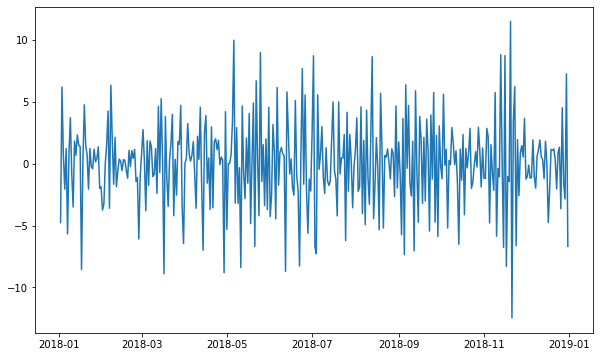

In [15]:
datasetLogDiffShifting=indexedDataset_logScale-indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

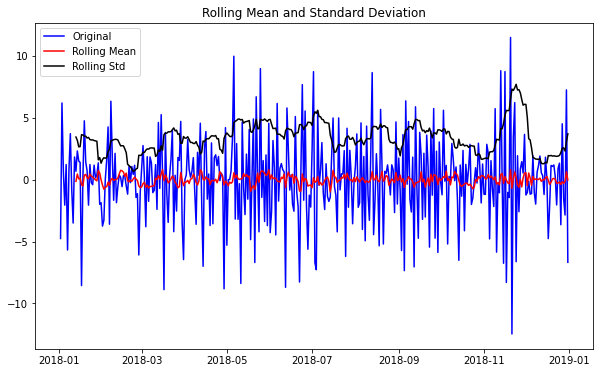

Results of Dickey-Fuller test:
Test Statistic                -9.342321e+00
p-value                        8.729787e-16
#lags used                     1.000000e+01
Number of Observations Used    3.530000e+02
Critical Value (1%)           -3.449011e+00
Critical Value (5%)           -2.869763e+00
Critical Value (10%)          -2.571151e+00
dtype: float64


In [16]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

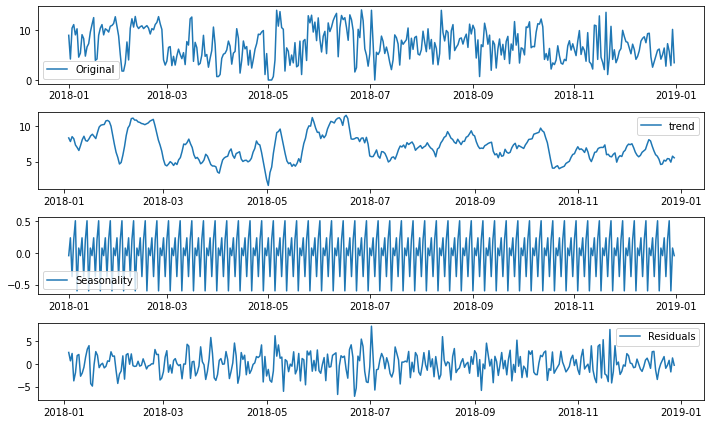

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()



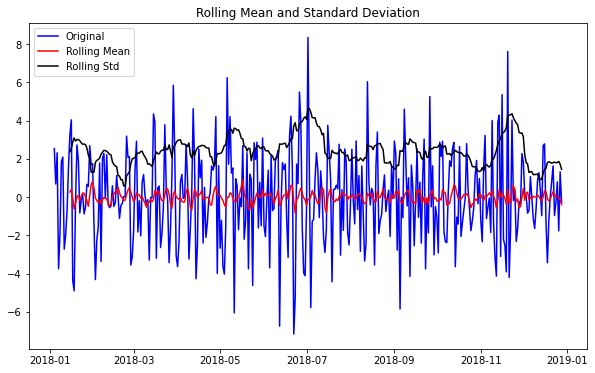

Results of Dickey-Fuller test:


KeyError: 'ShortTons'

In [25]:
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

c:\users\jake hinkle\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


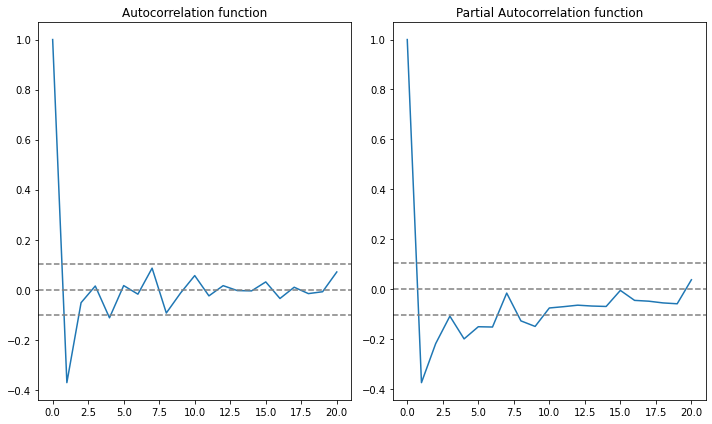

In [26]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(datasetLogDiffShifting, nlags=20)
lag_pacf=pacf(datasetLogDiffShifting, nlags=20, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray')
plt.title('Autocorrelation function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray')
plt.title('Partial Autocorrelation function')
plt.tight_layout()

c:\users\jake hinkle\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\jake hinkle\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarni

Plotting AR Model


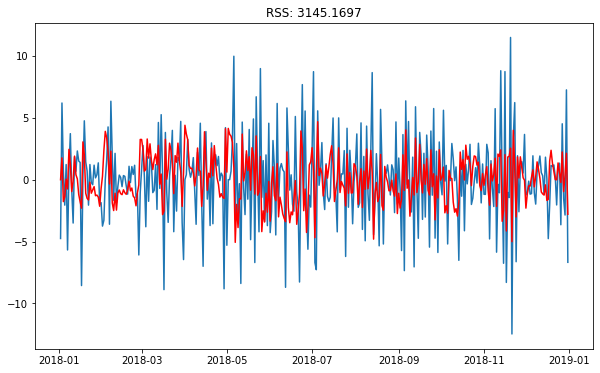

In [39]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(indexedDataset_logScale, order = (1,1,2))
results_AR=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['ShortTons'])**2))
print('Plotting AR Model')

c:\users\jake hinkle\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\jake hinkle\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\jake hinkle\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintaine

Plotting MA Model


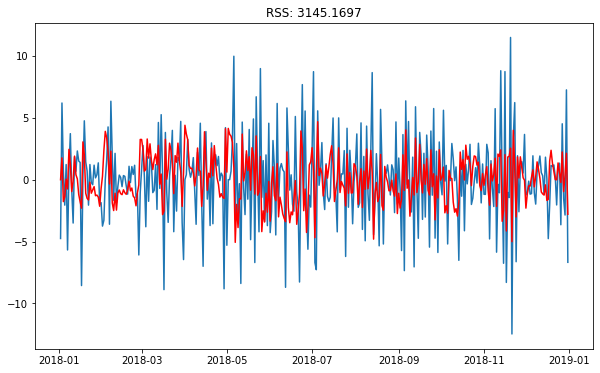

In [42]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(indexedDataset_logScale, order = (1,1,2))
results_MA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['ShortTons'])**2))
print('Plotting MA Model')